<a href="https://colab.research.google.com/github/ineslca/workbooks/blob/main/W6%2C_dataframe_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quantitative Methods 2:  Data Science and Visualisation
## Workshop 6: Advanced Dataframe Operations

Today we will be talking about and using **merging** and **joining** and performing some advanced Dataframe operations.

## Downloading the Data
Let's grab the data we will need this week from our course website and save it into our data folder. If you've not already created a data folder then do so using the following command. 

Don't worry if it generates an error, that means you've already got a data folder.

In [ ]:
!mkdir data

In [ ]:
!mkdir data/wk6
!mkdir data/wk6/crimeData

!curl https://qm2.s3.eu-west-2.amazonaws.com/wk6/crimeData/2020-03-metropolitan-street.csv -o ./data/wk6/crimeData/2020-03-metropolitan-street.csv
!curl https://qm2.s3.eu-west-2.amazonaws.com/wk6/crimeData/2020-04-metropolitan-street.csv -o ./data/wk6/crimeData/2020-04-metropolitan-street.csv
!curl https://qm2.s3.eu-west-2.amazonaws.com/wk6/crimeData/2020-05-metropolitan-street.csv -o ./data/wk6/crimeData/2020-05-metropolitan-street.csv
!curl https://qm2.s3.eu-west-2.amazonaws.com/wk6/crimeData/2020-06-metropolitan-street.csv -o ./data/wk6/crimeData/2020-06-metropolitan-street.csv
!curl https://qm2.s3.eu-west-2.amazonaws.com/wk6/crimeData/2020-07-metropolitan-street.csv -o ./data/wk6/crimeData/2020-07-metropolitan-street.csv
!curl https://qm2.s3.eu-west-2.amazonaws.com/wk6/crimeData/2020-08-metropolitan-street.csv -o ./data/wk6/crimeData/2020-08-metropolitan-street.csv
!curl https://qm2.s3.eu-west-2.amazonaws.com/wk6/lsoa-data.csv -o ./data/wk6/lsoa-data.csv

mkdir: cannot create directory ‘data/wk6’: File exists
mkdir: cannot create directory ‘data/wk6/crimeData’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.5M  100 19.5M    0     0  32.3M      0 --:--:-- --:--:-- --:--:-- 32.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.2M  100 21.2M    0     0  55.4M      0 --:--:-- --:--:-- --:--:-- 55.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.6M  100 22.6M    0     0  60.3M      0 --:--:-- --:--:-- --:--:-- 60.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20.9M  

`--------------------------------`

Let's remind ourselves of the two types of join

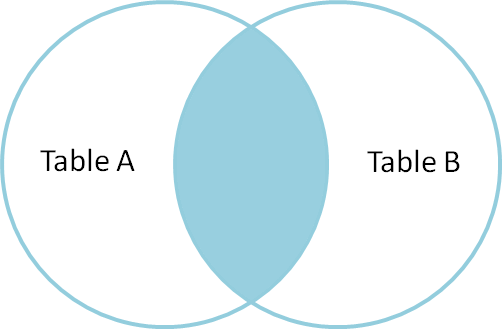

In [ ]:
from IPython.display import Image
Image("http://danielhammocks.uk/teaching/BASC/wk6/inner_join.png")

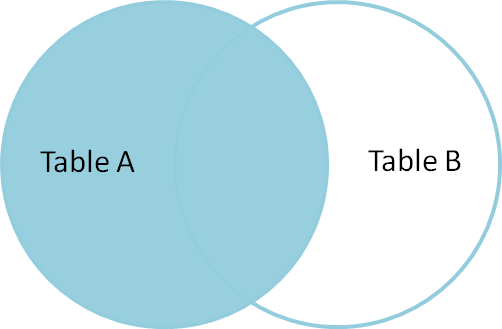

In [ ]:
Image("http://danielhammocks.uk/teaching/BASC/wk6/left_outer_join.png")

We start with an example.

Let's create two Dataframes 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [ ]:
df1 = pd.DataFrame(np.random.randn(5, 5))

In [ ]:
df1

,0,1,2,3,4
0,-1.147125,-1.140432,-0.341734,-2.338761,0.275693
1,-0.199884,-0.327936,1.442794,2.283854,-0.312242
2,0.455420,-1.707365,0.488175,-0.107236,-1.040094
3,1.052298,1.099960,-0.733325,0.138660,1.103515
4,-2.381680,2.073002,0.790677,-1.911498,2.077473


In [ ]:
df2 = pd.DataFrame(np.random.randn(3, 5))

In [ ]:
df2

,0,1,2,3,4
0,-1.533467,0.582318,0.294637,1.583048,0.853635
1,1.468662,0.100342,2.835232,-0.055519,-0.362082
2,-1.451262,0.276369,1.927570,-0.767134,0.898640


Let's merge them by rows. concat does that for us.

In [ ]:
df3 = pd.concat([df1,df2])

In [ ]:
df3

,0,1,2,3,4
0,-1.147125,-1.140432,-0.341734,-2.338761,0.275693
1,-0.199884,-0.327936,1.442794,2.283854,-0.312242
2,0.455420,-1.707365,0.488175,-0.107236,-1.040094
3,1.052298,1.099960,-0.733325,0.138660,1.103515
4,-2.381680,2.073002,0.790677,-1.911498,2.077473
0,-1.533467,0.582318,0.294637,1.583048,0.853635
1,1.468662,0.100342,2.835232,-0.055519,-0.362082
2,-1.451262,0.276369,1.927570,-0.767134,0.898640


What is the problem with the dataframe above? 

In [ ]:
#the row index

`-----------------------------------------`   
  
The solution is to set ignore_index to True.

In [ ]:
df3 = pd.concat([df1,df2], ignore_index=True)

In [ ]:
df3

,0,1,2,3,4
0,-1.147125,-1.140432,-0.341734,-2.338761,0.275693
1,-0.199884,-0.327936,1.442794,2.283854,-0.312242
2,0.455420,-1.707365,0.488175,-0.107236,-1.040094
3,1.052298,1.099960,-0.733325,0.138660,1.103515
4,-2.381680,2.073002,0.790677,-1.911498,2.077473
5,-1.533467,0.582318,0.294637,1.583048,0.853635
6,1.468662,0.100342,2.835232,-0.055519,-0.362082
7,-1.451262,0.276369,1.927570,-0.767134,0.898640


`ignore_index` is very useful when we want a new DataFrame which only contains data from other DataFrames , but unrelated otherwise. 




---

Now we want to look at more comlex merge operations, which take in to account the data values.

We have the last 6 months of crime data from the Metropolitan Police force. However, the data is not provided in a single file - it is separated into months. You should create a single dataframe called dataCrime that combines the 6 files.

*Hint:* A quick google and search on stack overflow will find you the answer!

In [ ]:
#Enter your code here.
crime1 = pd.read_csv('/content/data/wk6/crimeData/2020-03-metropolitan-street.csv')
crime2 = pd.read_csv('/content/data/wk6/crimeData/2020-04-metropolitan-street.csv')
crime3 = pd.read_csv('/content/data/wk6/crimeData/2020-05-metropolitan-street.csv')
crime4 = pd.read_csv('/content/data/wk6/crimeData/2020-06-metropolitan-street.csv')
crime5 = pd.read_csv('/content/data/wk6/crimeData/2020-07-metropolitan-street.csv')
crime6 = pd.read_csv('/content/data/wk6/crimeData/2020-08-metropolitan-street.csv')

In [ ]:
crime1.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,3123199437da9298db96b9e94b839e24a93efee18f3f5a...,2020-03,Metropolitan Police Service,Metropolitan Police Service,-0.638601,50.836270,On or near Spinney Walk,E01031393,Arun 003A,Violence and sexual offences,Investigation complete; no suspect identified,NaN
1,NaN,2020-03,Metropolitan Police Service,Metropolitan Police Service,0.135866,51.587336,On or near Gibbfield Close,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,NaN,2020-03,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,3f69f7d8f8a3b261221b1509172d72c8c08f6fb475055b...,2020-03,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,NaN
4,305415befc01a2a0d966e0a5d58670316ef3e57412d7cb...,2020-03,Metropolitan Police Service,Metropolitan Police Service,0.138906,51.588737,On or near Kingston Hill Avenue,E01000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,NaN


In [ ]:
dataCrime = pd.concat([crime1,crime2,crime3,crime4,crime5,crime6], ignore_index=True)

In [ ]:
#Print the first 5 rows
dataCrime.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,3123199437da9298db96b9e94b839e24a93efee18f3f5a...,2020-03,Metropolitan Police Service,Metropolitan Police Service,-0.638601,50.836270,On or near Spinney Walk,E01031393,Arun 003A,Violence and sexual offences,Investigation complete; no suspect identified,NaN
1,NaN,2020-03,Metropolitan Police Service,Metropolitan Police Service,0.135866,51.587336,On or near Gibbfield Close,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,NaN,2020-03,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,3f69f7d8f8a3b261221b1509172d72c8c08f6fb475055b...,2020-03,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,NaN
4,305415befc01a2a0d966e0a5d58670316ef3e57412d7cb...,2020-03,Metropolitan Police Service,Metropolitan Police Service,0.138906,51.588737,On or near Kingston Hill Avenue,E01000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,NaN


This dataset is not very informative in its current state due to the amount of information it contains. Summarise the number of crimes committed under each category for the last 6 months to provide an broad overview of the crime in London.

Hint: You can quickly summarise data in a DataFrame column by using the `value_counts()` method.

In [ ]:
#Enter Code Here
crimeCounts = dataCrime['Crime type'].value_counts()
crimeCounts

Anti-social behaviour           255293
Violence and sexual offences    114095
Vehicle crime                    49057
Other theft                      35869
Drugs                            27830
Public order                     27720
Burglary                         27152
Criminal damage and arson        25549
Shoplifting                      15148
Bicycle theft                    12306
Robbery                          11508
Theft from the person            10694
Other crime                       4941
Possession of weapons             2843
Name: Crime type, dtype: int64

Note that the returned data is a `Series`, we can turn it in to a DataFrame quite easily using 'to_frame'. Create a dataframe of the summary data called crimeCounts.

In [ ]:
crimeCounts = crimeCounts.to_frame()

In [ ]:
#View the dataframe
crimeCounts

,Crime type
Anti-social behaviour,255293
Violence and sexual offences,114095
Vehicle crime,49057
Other theft,35869
Drugs,27830
Public order,27720
Burglary,27152
Criminal damage and arson,25549
Shoplifting,15148
Bicycle theft,12306


---
# Merging with Real Data - London Demographic Dataset. 

Socio-economic and demographic factors are often associated with criminality and rates of crime. Using the latest census data lets explore some of these relationships. 



In [ ]:
#Specify the path to the demographic dataset
path = './data/wk6/lsoa-data.csv'
# Load the demographic dataset as df
dataLSOA =  pd.read_csv(path, encoding = 'latin1')

#View the first 5 entries
dataLSOA.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (174,175,176,178,189,253,254) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Lower Super Output Area,Names,Mid-year Population Estimates;All Ages;2001,Mid-year Population Estimates;All Ages;2002,Mid-year Population Estimates;All Ages;2003,Mid-year Population Estimates;All Ages;2004,Mid-year Population Estimates;All Ages;2005,Mid-year Population Estimates;All Ages;2006,Mid-year Population Estimates;All Ages;2007,Mid-year Population Estimates;All Ages;2008,Mid-year Population Estimates;All Ages;2009,Mid-year Population Estimates;All Ages;2010,Mid-year Population Estimates;All Ages;2011,Mid-year Population Estimates;All Ages;2012,Mid-year Population Estimates;All Ages;2013,Mid-year Population Estimates;Aged 0-15;2001,Mid-year Population Estimates;Aged 0-15;2002,Mid-year Population Estimates;Aged 0-15;2003,Mid-year Population Estimates;Aged 0-15;2004,Mid-year Population Estimates;Aged 0-15;2005,Mid-year Population Estimates;Aged 0-15;2006,Mid-year Population Estimates;Aged 0-15;2007,Mid-year Population Estimates;Aged 0-15;2008,Mid-year Population Estimates;Aged 0-15;2009,Mid-year Population Estimates;Aged 0-15;2010,Mid-year Population Estimates;Aged 0-15;2011,Mid-year Population Estimates;Aged 0-15;2012,Mid-year Population Estimates;Aged 0-15;2013,Mid-year Population Estimates;Aged 16-29;2001,Mid-year Population Estimates;Aged 16-29;2002,Mid-year Population Estimates;Aged 16-29;2003,Mid-year Population Estimates;Aged 16-29;2004,Mid-year Population Estimates;Aged 16-29;2005,Mid-year Population Estimates;Aged 16-29;2006,Mid-year Population Estimates;Aged 16-29;2007,Mid-year Population Estimates;Aged 16-29;2008,Mid-year Population Estimates;Aged 16-29;2009,Mid-year Population Estimates;Aged 16-29;2010,Mid-year Population Estimates;Aged 16-29;2011,Mid-year Population Estimates;Aged 16-29;2012,...,Car or van availability;Cars per household;2011,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;0,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;1a,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;1b,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;2,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;3,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;4,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;5,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;6a,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;6b,Public Transport Accessibility Levels (2014);Average Score;,Public Transport Accessibility Levels (2014);% 0-1 (poor access),Public Transport Accessibility Levels (2014);% 2-3 (average access),Public Transport Accessibility Levels (2014);% 4-6 (good access),Child Benefit;Total Number of Children;2013,Child Benefit;Total Number of Families Claiming Benefit;2013,Child Benefit;Number of families with 3+ children;2013,Child Benefit;% of families with 3+ children;2013,"Household Income, 2011/12;Mean Annual Household Income estimate (£)","Household Income, 2011/12;Median Annual Household Income estimate (£)",Road Casualties;2010;Fatal,Road Casualties;2010;Serious,Road Casualties;2010;Slight,Road Casualties;2010;2010 Total,Road Casualties;2011;Fatal,Road Casualties;2011;Serious,Road Casualties;2011;Slight,Road Casualties;2011;2011 Total,Road Casualties;2012;Fatal,Road Casualties;2012;Serious,Road Casualties;2012;Slight,Road Casualties;2012;2012 Total,Road Casualties;2013;Fatal,Road Casualties;2013;Serious,Road Casualties;2013;Slight,Road Casualties;2013;2013 Total,Road Casualties;2014;Fatal,Road Casualties;2014;Serious,Road Casualties;2014;Slight,Road Casualties;2014;2014 Total
0,E01000907,Camden 001A,1519.0,1538.0,1528.0,1547.0,1593.0,1492.0,1455.0,1457.0,1421.0,1410.0,1431.0,1457.0,1466.0,339.0,349.0,321.0,313.0,333.0,314.0,303.0,312.0,301.0,302.0,296.0,309.0,329.0,347.0,329.0,348.0,348.0,356.0,306.0,298.0,282.0,265.0,245.0,244.0

Merge the dataCrime and dataLSOA dataframes into a single dataframe called dataLondon.

In [ ]:
#Enter your code here.
dataLondon = pd.concat([dataCrime,dataLSOA],ignore_index=True)

In [ ]:
#View the combined dataset
dataLondon.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Lower Super Output Area,Names,Mid-year Population Estimates;All Ages;2001,Mid-year Population Estimates;All Ages;2002,Mid-year Population Estimates;All Ages;2003,Mid-year Population Estimates;All Ages;2004,Mid-year Population Estimates;All Ages;2005,Mid-year Population Estimates;All Ages;2006,Mid-year Population Estimates;All Ages;2007,Mid-year Population Estimates;All Ages;2008,Mid-year Population Estimates;All Ages;2009,Mid-year Population Estimates;All Ages;2010,Mid-year Population Estimates;All Ages;2011,Mid-year Population Estimates;All Ages;2012,Mid-year Population Estimates;All Ages;2013,Mid-year Population Estimates;Aged 0-15;2001,Mid-year Population Estimates;Aged 0-15;2002,Mid-year Population Estimates;Aged 0-15;2003,Mid-year Population Estimates;Aged 0-15;2004,Mid-year Population Estimates;Aged 0-15;2005,Mid-year Population Estimates;Aged 0-15;2006,Mid-year Population Estimates;Aged 0-15;2007,Mid-year Population Estimates;Aged 0-15;2008,Mid-year Population Estimates;Aged 0-15;2009,Mid-year Population Estimates;Aged 0-15;2010,Mid-year Population Estimates;Aged 0-15;2011,Mid-year Population Estimates;Aged 0-15;2012,Mid-year Population Estimates;Aged 0-15;2013,...,Car or van availability;Cars per household;2011,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;0,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;1a,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;1b,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;2,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;3,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;4,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;5,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;6a,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;6b,Public Transport Accessibility Levels (2014);Average Score;,Public Transport Accessibility Levels (2014);% 0-1 (poor access),Public Transport Accessibility Levels (2014);% 2-3 (average access),Public Transport Accessibility Levels (2014);% 4-6 (good access),Child Benefit;Total Number of Children;2013,Child Benefit;Total Number of Families Claiming Benefit;2013,Child Benefit;Number of families with 3+ children;2013,Child Benefit;% of families with 3+ children;2013,"Household Income, 2011/12;Mean Annual Household Income estimate (£)","Household Income, 2011/12;Median Annual Household Income estimate (£)",Road Casualties;2010;Fatal,Road Casualties;2010;Serious,Road Casualties;2010;Slight,Road Casualties;2010;2010 Total,Road Casualties;2011;Fatal,Road Casualties;2011;Serious,Road Casualties;2011;Slight,Road Casualties;2011;2011 Total,Road Casualties;2012;Fatal,Road Casualties;2012;Serious,Road Casualties;2012;Slight,Road Casualties;2012;2012 Total,Road Casualties;2013;Fatal,Road Casualties;2013;Serious,Road Casualties;2013;Slight,Road Casualties;2013;2013 Total,Road Casualties;2014;Fatal,Road Casualties;2014;Serious,Road Casualties;2014;Slight,Road Casualties;2014;2014 Total
0,3123199437da9298db96b9e94b839e24a93efee18f3f5a...,2020-03,Metropolitan Police Service,Metropolitan Police Service,-0.638601,50.836270,On or near Spinney Walk,E01031393,Arun 003A,Violence and sexual offences,Investigation complete; no suspect identified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2020-03,Metropolitan Police Service,Metropolitan Police Service,0.135866,51.587336,On or near Gibbfield Close,E01000027,Barking and Dagenham

# Dataframe Subsets

There are now a lot of columns in our dataset. We can use the following command to get a list of the column names:

In [ ]:
dataLondon.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       ...
       'Road Casualties;2012;Slight', 'Road Casualties;2012;2012 Total',
       'Road Casualties;2013;Fatal', 'Road Casualties;2013;Serious',
       'Road Casualties;2013;Slight', 'Road Casualties;2013;2013 Total',
       'Road Casualties;2014;Fatal', 'Road Casualties;2014;Serious',
       'Road Casualties;2014;Slight', 'Road Casualties;2014;2014 Total'],
      dtype='object', length=289)

You will see that there are 289 different columns now! Suppose we are only interested in the Household composition data. We can use the `filter()` method combined with a regular expression to subset all of the columns that begin with a specific phrase.

In [ ]:
#Filter the dataset
dataHouseComposition = dataLondon.filter(regex=r'^Household Composition', axis=1)

#Preview the data
dataHouseComposition.head()

,Household Composition;Couple household with dependent children;2011,Household Composition;Couple household without dependent children;2011,Household Composition;Lone parent household;2011,Household Composition;One person household;2011,Household Composition;Other household Types;2011,Household Composition;% Couple household with dependent children;2011,Household Composition;% Couple household without dependent children;2011,Household Composition;% Lone parent household;2011,Household Composition;% One person household;2011,Household Composition;% Other multi person household;2011
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



We can also filter the dataframe on specific values to analyse crime in areas with specific demographics.

Lets look at the most top 5 prevalent crimes in areas where the median household income is greater than £50,000 per year.


In [ ]:
dataLondon[dataLondon['Household Income, 2011/12;Median Annual Household Income estimate (£)']>50000].value_counts('Crime type')

Series([], dtype: int64)

Repeat this for the areas where the median household income is less than £20,000 per year.

In [ ]:
#Enter your code here
dataLondon[dataLondon['Household Income, 2011/12;Median Annual Household Income estimate (£)']<20000].value_counts('Crime type')

Series([], dtype: int64)

Can we compare these directly? If not, why not, and what could be done to resolve this issue?

In [ ]:
#I don't get an actual value from the dataset... I am confused

If you think a correction is needed implement it here...

 What do you notice between the two sets of results? 

In [ ]:
#We see that... 

# Plotting the Data


Let us first create a time-series plot in order to better understand how Londons crime profile has changed over the last 6 months.

In [ ]:
#Convert the month column to a date format
dataLondon['Month'] = pd.to_datetime(dataLondon['Month'])

#Use the groupby method to create a dataframe of the plotting data
dataPlot = dataLondon.groupby(['Month', 'Crime type']).size().reset_index(name="Count")

#View the dataframe
dataPlot.head()

,Month,Crime type,Count
0,2020-03-01,Anti-social behaviour,23014
1,2020-03-01,Bicycle theft,1078
2,2020-03-01,Burglary,5362
3,2020-03-01,Criminal damage and arson,4392
4,2020-03-01,Drugs,3657


Text(0.5, 1.0, 'Frequency of each Crime Type from March to August 2020 in London')

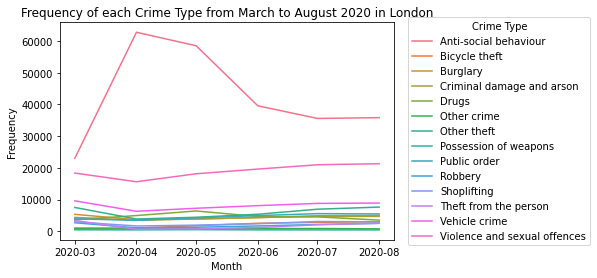

In [ ]:
#Seaborn: visualisation library
import seaborn as sns

#Create the plot
plt.figure()
sns.lineplot(data = dataPlot, x = 'Month', y = 'Count', hue = 'Crime type')

#Move the legend outside of the plot
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), ncol=1, title = 'Crime Type')

#Don't forget to add a title and label your axes!
plt.ylabel('Frequency')
plt.title('Frequency of each Crime Type from March to August 2020 in London')

This creates a nice plot but it is difficult to distinguish the different categories. An interactive plot would help us overcome these difficulties...

Below we use the plotly library to create an interactive equivalent of the above graph. Have a play around with the hover and different features available on the top right of the plot. 

We will not cover plotly further so if you are not sure on what these commands are doing then check out the plotly documentation.

In [ ]:
#Plotly Express: Visualisation Library (component of plotly)
import plotly.express as px

#Create the plot
fig = px.line(dataPlot, x = 'Month', y = 'Count',
              color = 'Crime type', line_group = 'Crime type',
              labels={"Count": "Frequency", "Crime type": "Crime Type"},
              title = 'Frequency of each Crime Type from March to August 2020 in London',
              hover_name = 'Crime type')

#Tidy up the legend
fig.for_each_trace(lambda t: t.update(name=t.name.replace("Crime Type=", "")))
fig.show()

What effect do you think covid-19 had on the crime profile? Consider the individual crime types and how lock down may have affected them. Do you need additional data to backup your claims? If so, what data?

In [ ]:
#antisocial behaviour seems to have tremendously increased during the first couple of months of lockdown
#they have decreased since april 2020 (maybe the getting used to being quaratined? or just the lack of human contact,
# although I've heard Londoners are not as strict as people in other european cities)
#violence and sexual offences seem to decrease from march to april but then increase again
#it's hard to see the trends of the other crime types but it seems like they all decrease until april and then increase
#again except for posession of weapons and vehicle crime
#the only one that increases at first and then decreases from may is drug use, to cope with pandemic stress? I don't know, not my method to cope with stress...
#overall the decline in robbery, assault etc can be explained by stricter measures at the beginning of lockdown
#the following incline can therefore be explained by a more 'relaxed' situation 'back to normal', there is no good way to formulate this
#the two crimes that I see increased were drug use and anti-social behaviour, maybe reactions to the pandemic craziness 

## Exercise:

Investigate the trend between a demographic variable and crime.

1. Choose a socio-demographic variable from the dataset and choose a crime variable that you would like to compare. This could be the total crime count in each LSOA, or the frequency of a specific crime type.
2. Manipulate the dataframes as necessary in order to aid plotting.
3. Plot absolute values, percent changes, means, medians. Compare the results, see if anything can be concluded. 
4. **Advanced:** Create a plot with different series.
